In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dense, Conv1D, Dropout, MaxPool1D, Flatten
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
# This is not a mandatory step
# This is used to set the figure size so that the plots appear to be of that size
# If this parameter is not set, then the default plot size is used
plt.rcParams['figure.figsize'] = 30, 15

In [ ]:
# Loading all the preformatted datasets fromm the saved location
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
# This step is actually supposed to be used to randomly split dataset into training and testing set as well as to shuffle them
# However, here I am using it just to shuffle the dataset and therefore the test_size is equated to 0
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0, random_state=0)

In [5]:
# Just printing out the dimentions to verify the data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 256, 2) (1200, 1)
(180, 256, 2) (180, 1)


In [6]:
# Build the model

# The model architecture type is sequential hence that is used
model = Sequential()

# We are using 4 convolution layers for feature extraction
model.add(Conv1D(filters=512, kernel_size=32, padding='same', kernel_initializer='normal', activation='relu', input_shape=(256, 2)))
model.add(Conv1D(filters=512, kernel_size=32, padding='same', kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # This is the dropout layer. It's main function is to inactivate 20% of neurons in order to prevent overfitting
model.add(Conv1D(filters=256, kernel_size=32, padding='same', kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=256, kernel_size=32, padding='same', kernel_initializer='normal', activation='relu'))
model.add(MaxPool1D(pool_size=128)) # We use MaxPooling with a filter size of 128. This also contributes to generalization
model.add(Dropout(0.2))

# The prevous step gices an output of multi dimentional data, which cannot be fead directly into the feed forward neural network. Hence, the model is flattened
model.add(Flatten())
# One hidden layer of 128 neurons have been used in order to have better classification results
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
# The final neuron HAS to be 1 in number and cannot be more than that. This is because this is a binary classification problem and only 1 neuron is enough to denote the class '1' or '0'
model.add(Dense(units=1, activation='sigmoid'))

# Print the summary of the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 256, 512)          33280     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 256, 512)          8389120   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 512)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 256)          4194560   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256, 256)          0         
_________________________________________________________________
conv1d_4 (Conv1D)    

In [7]:
# Train the mode
# To my experience, the Stocastic Gradient Descent Optimizer works the best. Adam optimizer also works but not as good as SGD
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train,  batch_size=64, epochs=5, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1200 samples, validate on 180 samples
Epoch 1/5
1200/1200 [==============================] - 14s 12ms/step - loss: 4.0444 - acc: 0.5750 - val_loss: 0.7130 - val_acc: 0.6222
Epoch 2/5
1200/1200 [==============================] - 7s 6ms/step - loss: 1.5851 - acc: 0.7725 - val_loss: 0.2993 - val_acc: 0.9333
Epoch 3/5
1200/1200 [==============================] - 7s 6ms/step - loss: 0.8153 - acc: 0.8375 - val_loss: 0.2989 - val_acc: 0.9111
Epoch 4/5
1200/1200 [==============================] - 7s 6ms/step - loss: 0.5098 - acc: 0.8717 - val_loss: 0.2252 - val_acc: 0.9111
Epoch 5/5
1200/1200 [==============================] - 7s 6ms/step - loss: 0.4888 - acc: 0.8842 - val_loss: 0.2281 - val_acc: 0.9111


Text(0.5, 1.0, 'Accuracy Curves')

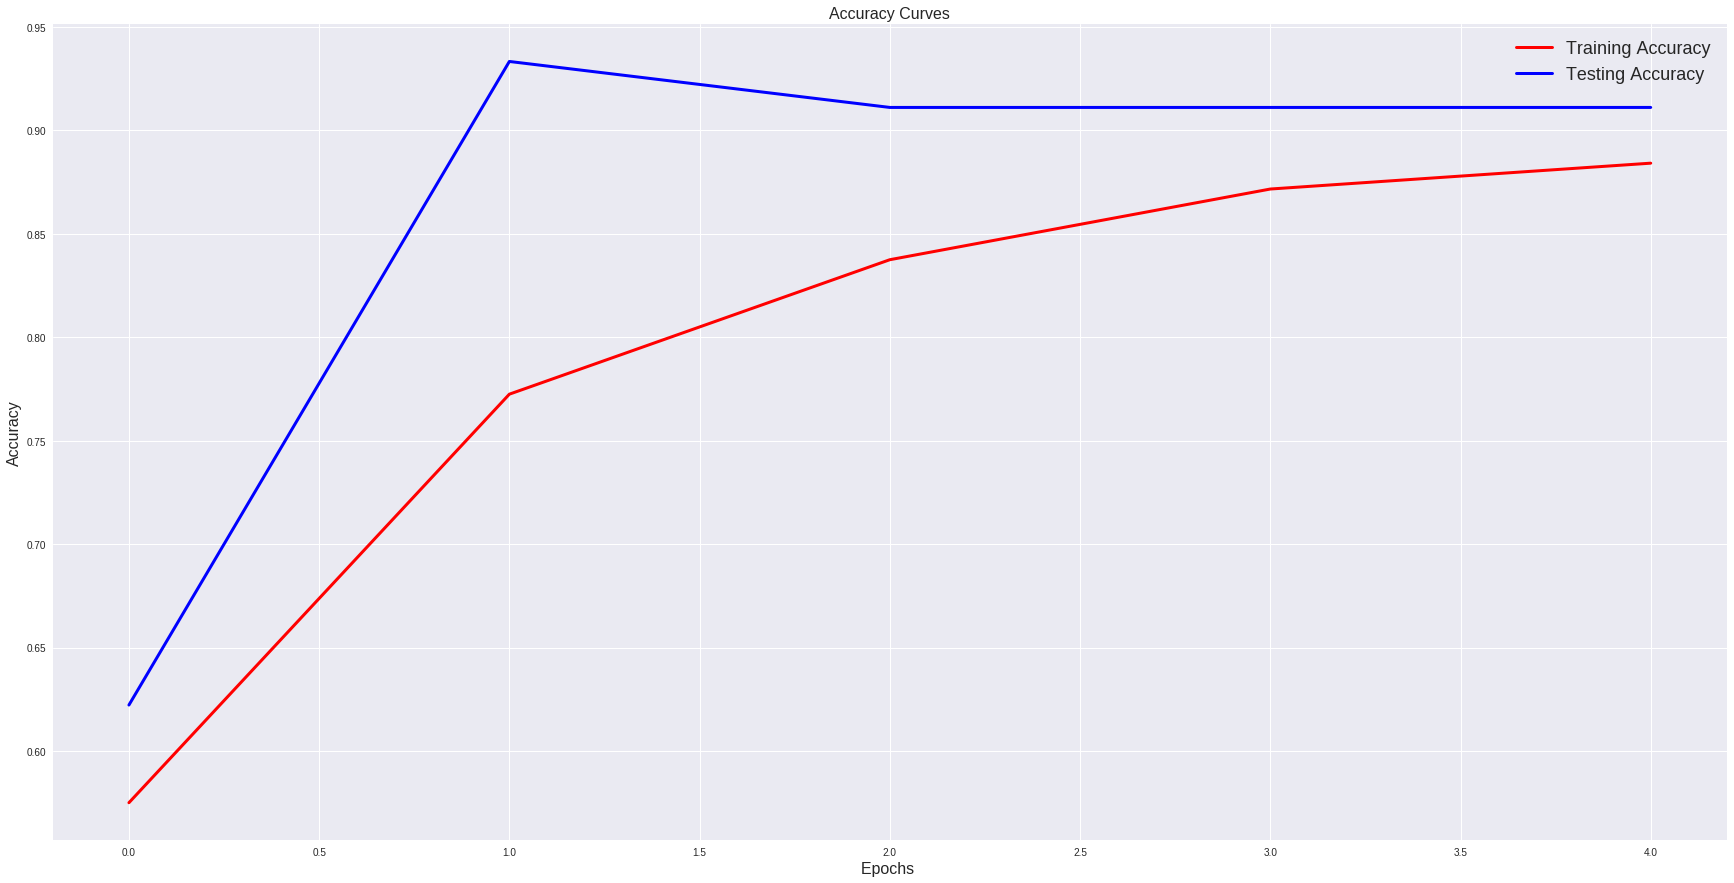

In [8]:
# Plot the model Accuracy graph (Ideally, it should be Logarithmic shape)
plt.plot(history.history['acc'],'r',linewidth=3.0, label='Training Accuracy')
plt.plot(history.history['val_acc'],'b',linewidth=3.0, label='Testing Accuracy')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

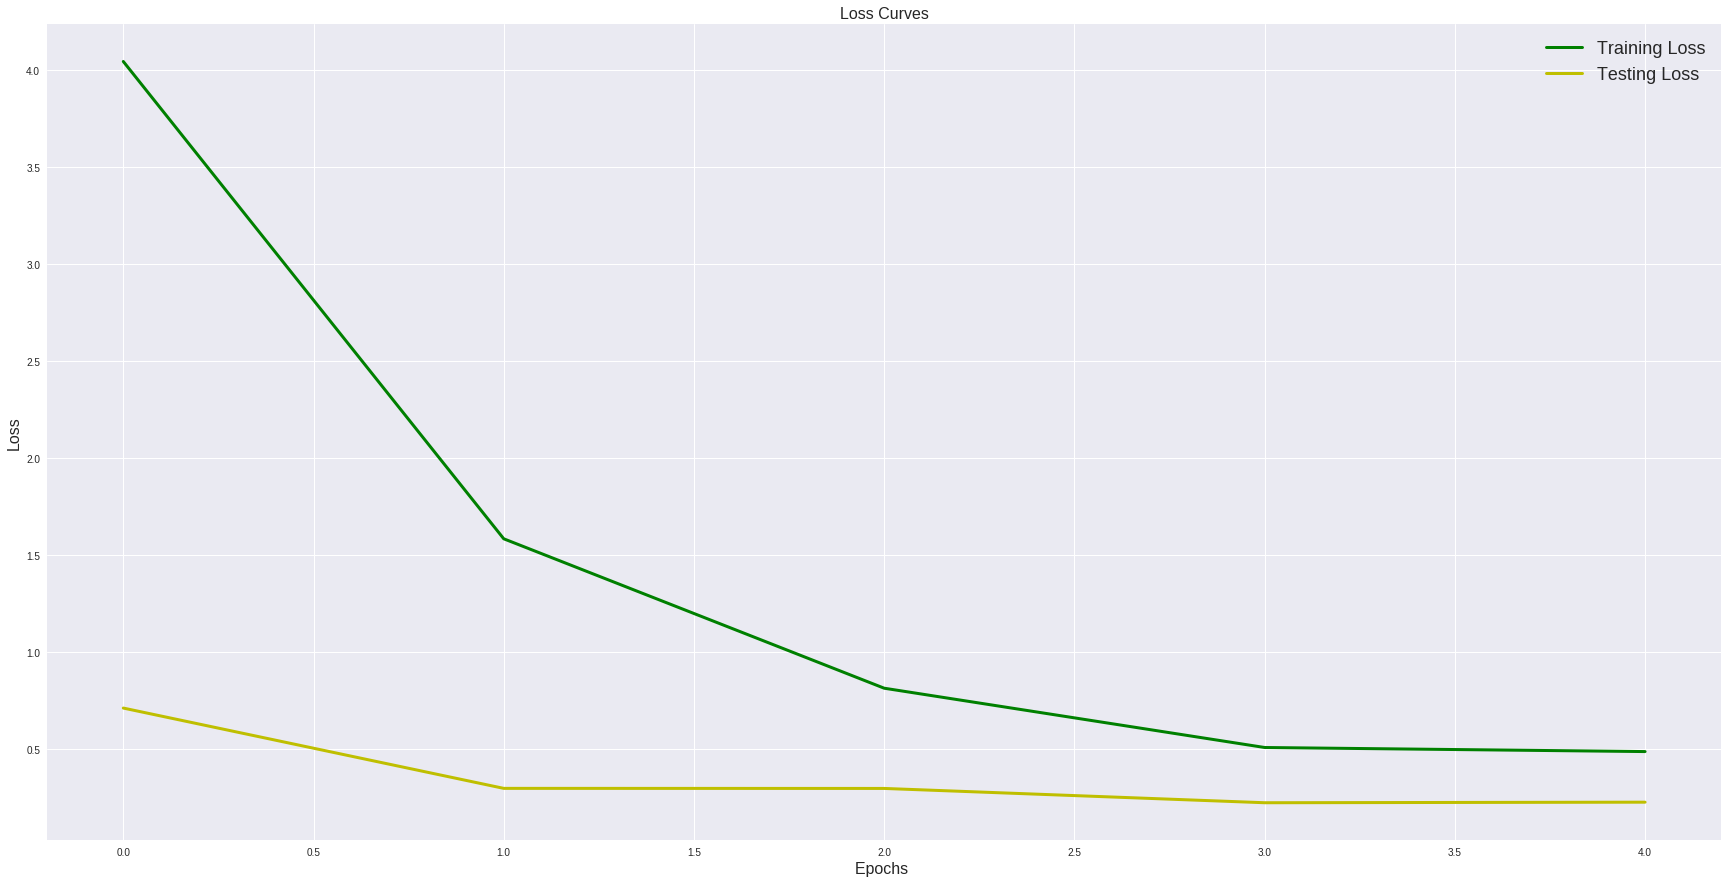

In [9]:
# Plot the model Loss graph (Ideally it should be Exponentially decreasing shape)
plt.plot(history.history['loss'], 'g', linewidth=3.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'y', linewidth=3.0, label='Testing Loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)